# Basic MLMC runs and plots

In [1]:
import numpy as np 


def non_hom_test(x, y):
    return np.sin(x)*np.sin(y)


def test_phi(x, y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)


def test_bound(x, y):
    return 0


def test_rhs(x, y):
    return np.pi**2 * (np.sin(np.pi * x)*np.sin(np.pi * y))


In [2]:
from mlmc import mlmc
from tqdm.notebook import tqdm


def check_mlmc(N, epsilon, dt0, x=.5, y=.5):
    errs = np.zeros(N)
    expectation = np.zeros(N)
    cost = np.zeros(N)
    max_level = np.zeros(N)
    for i in tqdm(range(N)):
        expectation[i], cost[i], max_level[i] = mlmc(x, y, 
                                                     test_bound, test_rhs, 
                                                     dt0, epsilon)
        errs[i] =  abs(test_phi(x, y) - expectation[i])
        
    return errs, cost, max_level

  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.021332908564103893
maximal error:  0.060034805304840066
minimal error:  0.0003649153829110574
std of error:  0.01608350251300013


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.01790293470217483
maximal error:  0.06644263636833725
minimal error:  0.0004177620628192935
std of error:  0.013883408982198328


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.022868321222373655
maximal error:  0.07369488066694396
minimal error:  0.00018657212634365372
std of error:  0.016992357469320245


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.022000486316401315
maximal error:  0.06566281041985289
minimal error:  0.0008562764356607744
std of error:  0.017628844467207395


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.020880686105952354
maximal error:  0.060547587109469836
minimal error:  0.00012237034882933706
std of error:  0.015856496954238186


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.01737913477653381
maximal error:  0.08311524018358463
minimal error:  0.0005918068325212467
std of error:  0.01434856633602338


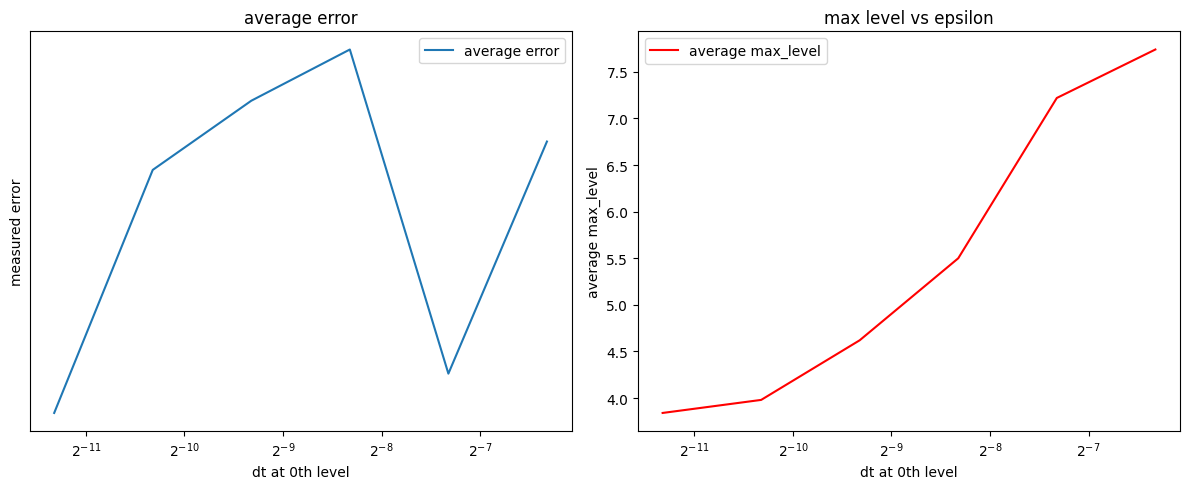

In [3]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0s = [.1/(2**i) for i in range(3, 9)]
epsilon = .025
mean_errs = []
mean_levels = []
mean_costs = []

for dt0 in dt0s:
    errs, costs, levels = check_mlmc(N, epsilon, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(dt0s, mean_errs, label="average error", base=2)
axes[0].set_title("average error")
axes[0].set_xlabel("dt at 0th level")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(dt0s, mean_levels, label="average max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("dt at 0th level")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log", base=2)

axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.06383190111714232
maximal error:  0.12212090974982792
minimal error:  0.007137936354656427
std of error:  0.03126778176263683


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.037137089274747855
maximal error:  0.09579419158904812
minimal error:  0.001587849389697471
std of error:  0.027164073359971133


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.02293778585254762
maximal error:  0.05936904424817935
minimal error:  0.0006405759483922857
std of error:  0.01718325887687404


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.01609984902361378
maximal error:  0.047424305424610624
minimal error:  5.1643793617328626e-05
std of error:  0.010515047450735308


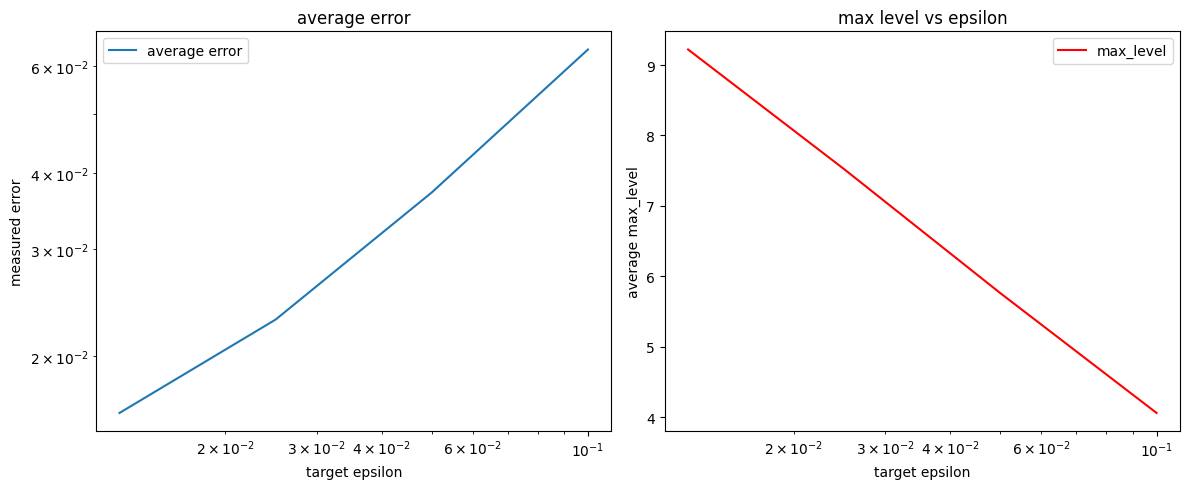

In [4]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0 = .01
epsilons = [.1, .05, .025, .0125]
mean_errs = []
mean_levels = []
mean_costs = []

for eps in epsilons:
    errs, costs, levels = check_mlmc(N, eps, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(epsilons, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("target epsilon")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(epsilons, mean_levels, label="max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("target epsilon")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log")
axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

In [5]:
# benchmark how long it takes to generate a single sample
from random_walk import feynman_kac_correlated
x = .5
y = .5
dt_fine = .000001
level = 1

%timeit feynman_kac_correlated((x, y, test_bound, test_rhs, dt_fine, level))

7.84 ms ± 358 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
y = np.log2(np.abs(np.array([-6.05463385e-02, -3.70904309e-02, -2.06358718e-02, 
                    -2.25945456e-02, -1.50705625e-02, -9.64745850e-04])))
x = np.linspace(1, 6, 6)

a, b = np.polyfit(x, y, 1)
a2, b2, = np.polyfit(x[:-1], y[:-1], 1)

<function matplotlib.pyplot.show(close=None, block=None)>

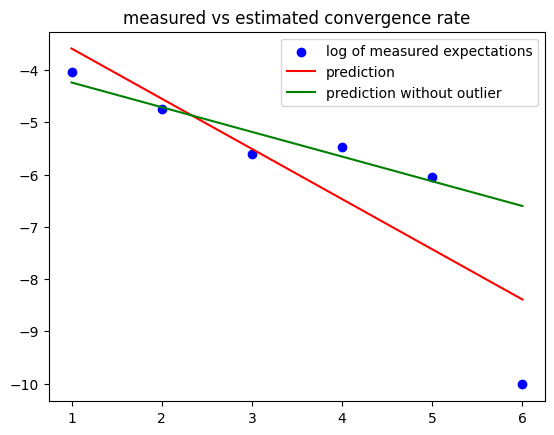

In [7]:
plt.scatter(x, y, label="log of measured expectations", color="b")
plt.plot(x, a*x + b, label="prediction", color="r")
plt.plot(x, a2*x + b2, label="prediction without outlier", color="g")
plt.title("measured vs estimated convergence rate")
plt.legend()
plt.show